Based on Andrew Abela, there are 4 purposes of data visualization which can be seen in the figure below.

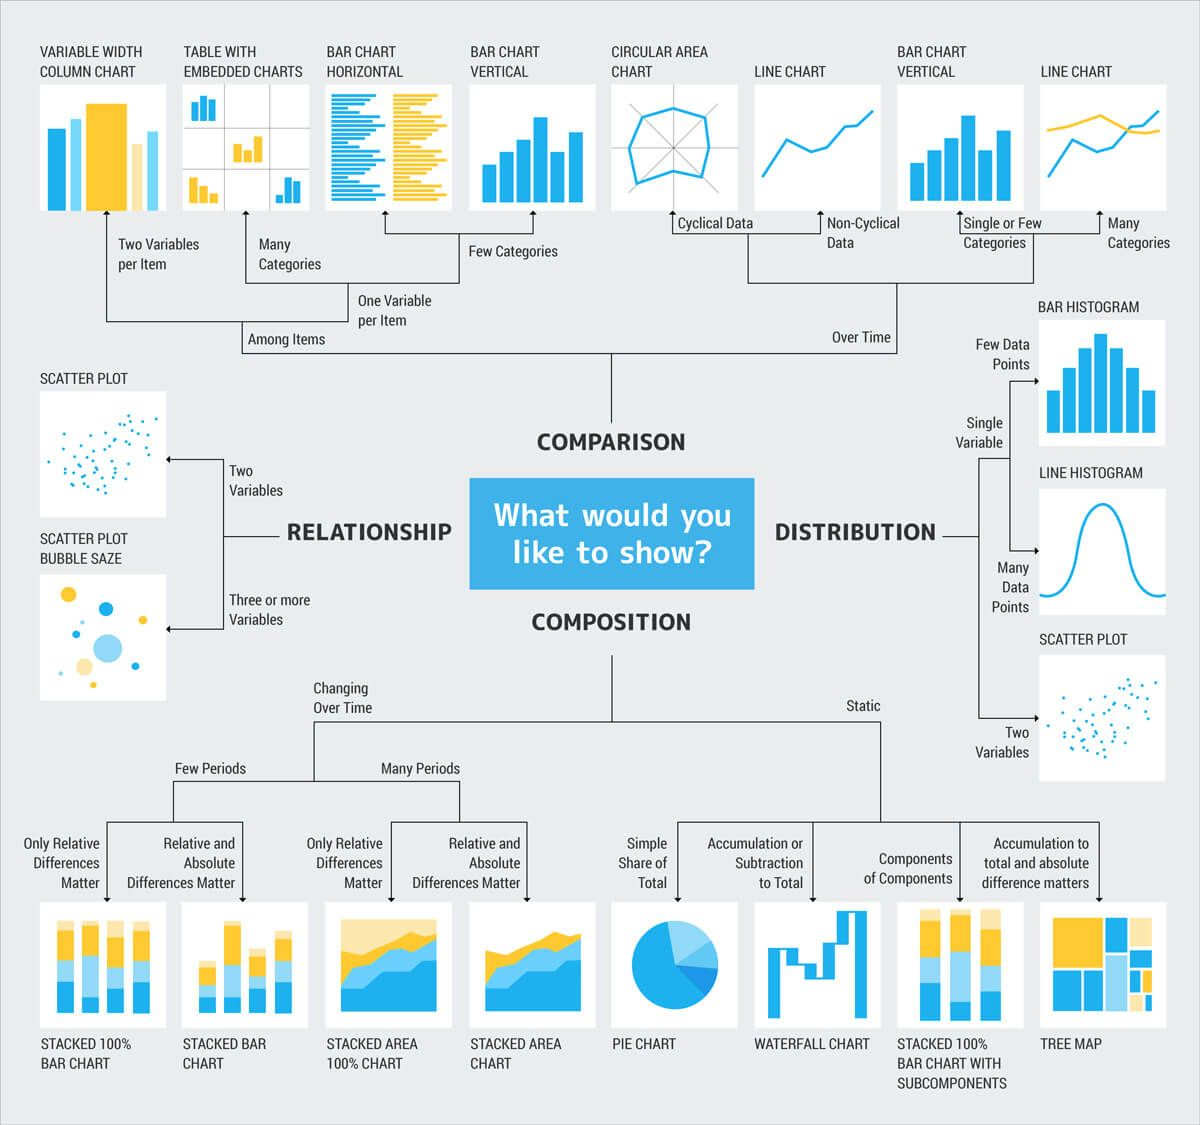

From previous module titled "Data Visualization with Python Matplotlib for Beginner - Part 1", we will further the data visualization by using multi-line chart, histogram, and scatterplot based on its purposes respectively.

# 1. Importing The Data
While importing the data, we also add the "GMV" column as the product between "item_price" and "quantity".

In [1]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
%config Completer.use_jedi = False

In [2]:
dataset = pd.read_csv('retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
dataset.head()

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,order_month,gmv
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000,2019-10,7400000
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000,2019-10,1208000
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000,2019-11,8360000
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000,2019-08,820000
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000,2019-10,8950000


# 2. Multi-Line Chart
First of all, we will see the trend of each brand contribution to GMV.

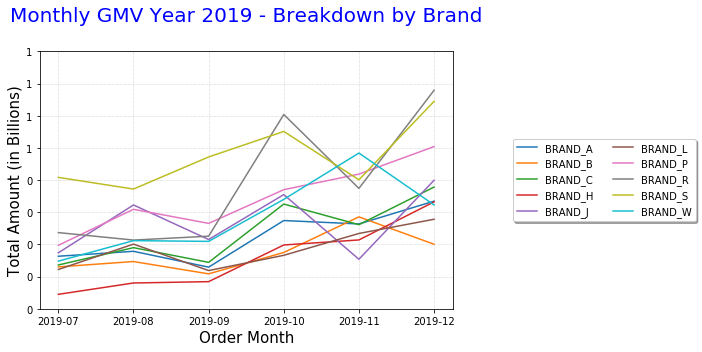

In [3]:
import matplotlib.pyplot as plt
dataset.groupby(['order_month','brand'])['gmv'].sum().unstack().plot()
plt.title('Monthly GMV Year 2019 - Breakdown by Brand',loc='center',pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount (in Billions)',fontsize = 15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='right', bbox_to_anchor=(1.6,0.5), shadow=True, ncol=2)
plt.gcf().set_size_inches(12, 5)
plt.tight_layout()

From multi-line above, the red line as the "Brand_H" appears to have the consistent rise of GMV contribution during the second semester of 2019. Beside GMV, we also can analysis the contribution of each province to GMV provided in the dataset.

<Figure size 432x288 with 0 Axes>

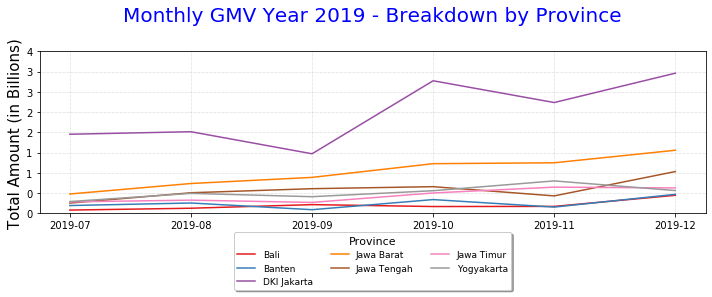

In [4]:
import matplotlib.pyplot as plt
plt.clf()
dataset.groupby(['order_month','province'])['gmv'].sum().unstack().plot(cmap='Set1')
plt.title('Monthly GMV Year 2019 - Breakdown by Province',loc='center',pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount (in Billions)',fontsize = 15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='lower center', bbox_to_anchor=(0.5,-0.5), shadow=True, ncol=3, title='Province',fontsize=9, title_fontsize=11)
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

It can be seen that DKI Jakarta have the most GMV contribution during all time provided in the chart above.

## Line Chart GMV Breakdown by Top Provinces
In this part, we will rearange the data based on the provinces contribution to GMW by the top five provinces in GMV and grouping the rest of it as 'other'. Furthermore, we visuzalize the GMV based on the GMV of each province.

      province          gmv
2  DKI Jakarta  14902763000
3   Jawa Barat   6128149000
4  Jawa Tengah   3485884000
6   Yogyakarta   3111241000
5   Jawa Timur   2649486000


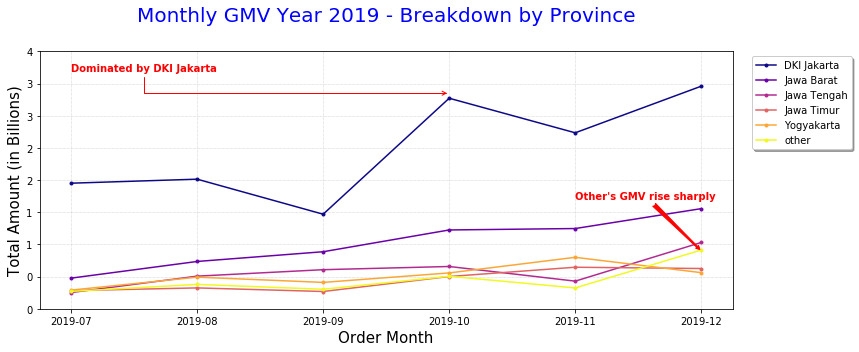

In [5]:
top_provinces = (dataset.groupby('province')['gmv'].sum().reset_index().sort_values(by='gmv',ascending=False).head(5))
print(top_provinces)
dataset['province_top'] = dataset['province'].apply(lambda x: x if (x in top_provinces['province'].to_list()) else 'other')
  
dataset.groupby(['order_month','province_top'])['gmv'].sum().unstack().plot(marker='.', cmap='plasma')
plt.title('Monthly GMV Year 2019 - Breakdown by Province',loc='center',pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount (in Billions)',fontsize = 15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
# Anotasi pertama
plt.annotate("Other's GMV rise sharply", xy=(5, 900000000),
             xytext=(4, 1700000000), weight='bold', color='red',
             arrowprops=dict(arrowstyle='fancy',connectionstyle="arc3",color='red'))
# Anotasi kedua
plt.annotate('Dominated by DKI Jakarta', xy=(3, 3350000000),xytext=(0, 3700000000), 
             weight='bold', color='red',
             arrowprops=dict(arrowstyle='->',connectionstyle="angle",color='red'))
plt.gcf().set_size_inches(12, 5)
plt.tight_layout()
plt.show()

As we can see above, the montly GMV is dominated by DKI Jakarta. Moreover, the GMV of 'other' seemed to increased sharply in the end of 2019.

# 3. Pie Chart and Bar Chart
In this part, we will analysis the behavior of five cities in Jakarta during the fourth quarter (Q4) in 2019. To see the presentation of the sum of each city's GMV toward overall during Q4, we will visualize by Pie Chart. In order hand, Bar Chart also can be utilized to see the city's individual GMV.

In [6]:
dataset_dki_q4 = dataset[(dataset['province']=='DKI Jakarta') & (dataset['order_month'] >= '2019-10')]
dataset_dki_q4.head()

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,order_month,gmv,province_top
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000,2019-10,7400000,DKI Jakarta
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000,2019-10,1208000,DKI Jakarta
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000,2019-11,8360000,DKI Jakarta
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000,2019-10,8950000,DKI Jakarta
6,1711399,2019-11-04,16791,Jakarta Barat,DKI Jakarta,P0860,BRAND_C,1,1465000,2019-11,1465000,DKI Jakarta


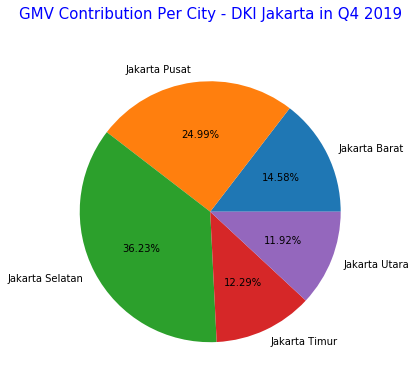

In [7]:
import matplotlib.pyplot as plt
gmv_per_city_dki_q4 = dataset_dki_q4.groupby('city')['gmv'].sum().reset_index()
plt.figure(figsize=(6,6))
plt.pie(gmv_per_city_dki_q4['gmv'], labels = gmv_per_city_dki_q4['city'], autopct = '%1.2f%%')
plt.title('GMV Contribution Per City - DKI Jakarta in Q4 2019', loc='center', pad=30, fontsize=15, color='blue')
plt.show()

As we can see in the pir chart above, both Jakarta Selatan dan Jakarta Pusat have higher contribution in DKI Jakarta GMV.

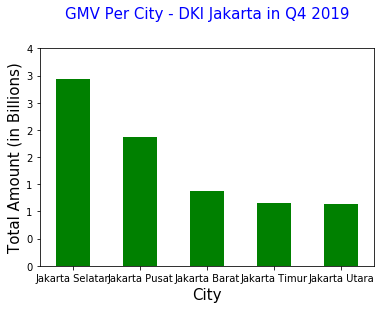

In [8]:
import matplotlib.pyplot as plt
plt.clf()
dataset_dki_q4.groupby('city')['gmv'].sum().sort_values(ascending=False).plot(kind='bar', color='green')
plt.title('GMV Per City - DKI Jakarta in Q4 2019', loc='center', pad=30, fontsize=15, color='blue')
plt.xlabel('City', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.xticks(rotation=0)
plt.show()

We also can visualize each GMV contribution of individual city in each month during Q4 by multi-line chart.

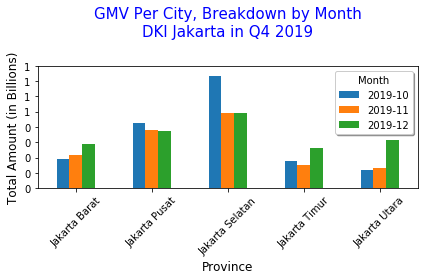

In [9]:
import matplotlib.pyplot as plt
dataset_dki_q4.groupby(['city','order_month'])['gmv'].sum().unstack().plot(kind='bar')
plt.title('GMV Per City, Breakdown by Month\nDKI Jakarta in Q4 2019',loc='center', pad=30, fontsize=15, color='blue')
plt.xlabel('Province', fontsize=12)
plt.ylabel('Total Amount (in Billions)', fontsize=12)
plt.legend(bbox_to_anchor=(1,1), shadow=True, title='Month')
plt.ylim(ymin=0)
labels,locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In overall, Jakarta Barat have the significant increase.

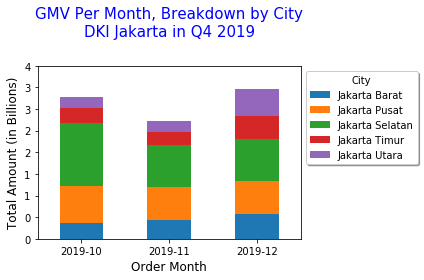

In [10]:
import matplotlib.pyplot as plt
dataset_dki_q4.groupby(['order_month','city'])['gmv'].sum().sort_values(ascending=False).unstack().plot(kind='bar',stacked=True)
plt.title('GMV Per Month, Breakdown by City\nDKI Jakarta in Q4 2019',loc='center', pad=30, fontsize=15, color='blue')
plt.xlabel('Order Month', fontsize=12)
plt.ylabel('Total Amount (in Billions)', fontsize=12)
plt.legend(bbox_to_anchor=(1,1), shadow=True,ncol=1,title='City')
plt.ylim(ymin=0)
labels,locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

By stacked chart, we can see that Jakarta Selatan have highest proportion of GMV compared to other cities in DKI Jakarta. Moreover, it appers that three cities (Jakarta Barat, Jakarta Timur and Jakarta Utara) have the significant rise of GMV in December so that the total GMV of DKI Jakarta seems to rise overall.

# 4. Histogram and Scatterplot
After visualizing the data based on comparison and composition of the data, next we will continue to see the data distribution. In this part, we will see the data distribution and relationship between variabels.

Based on previous part, we know that DKI Jakarta have the most GMV among all provinces stated in the data. Furthermore, we will analysis this province (DKI Jakarta) more deeply. First, we will arange the data to see the number of orders made by each customers in DKI Jakarta, and also to see the GMV itself.

In [11]:
data_per_customer = (dataset_dki_q4.groupby('customer_id').agg({'order_id':'nunique','quantity': 'sum','gmv':'sum'}).reset_index().rename(columns={'order_id':'orders'}))
data_per_customer.sort_values(by='orders',ascending=False)

,customer_id,orders,quantity,gmv
0,12748,29,557,175286000
662,17841,26,270,144788000
207,14606,13,25,20714000
25,13089,8,166,93554000
462,16549,8,29,22714000
...,...,...,...,...
294,15154,1,4,2689000
291,15148,1,12,5400000
289,15121,1,8,2424000
288,15117,1,1,3494000


By using the 'agg' function to do the data aggregation, we create the column to present the number of orders (based on unique order_id), total quantity, and total GMV.

As the result, we get 711 customers having transactions in DKI Jakarta during Q4 2020.

By sorting the data, we can see that the customer havind id 12748 has made 29 transactions with 557 quantity 557, and its GMV more 175 million ! This is incredible. This kind of customer have to be preserved so that he/she can loyal to the products. 

## Histrogram
After seeing the GMV made by each customer in DKI Jakarta, we will try to see the distribution of the number of orders per customer in DKI Jakarta during Q4 2019 by histogram.

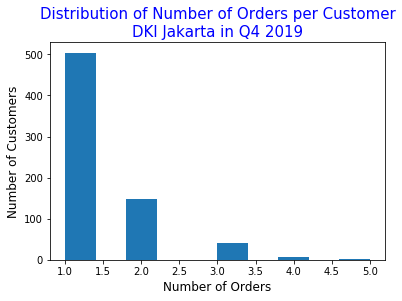

In [12]:
import matplotlib.pyplot as plt
plt.figure()
plt.hist(data_per_customer['orders'], range=(1,5))
plt.title('Distribution of Number of Orders per Customer\nDKI Jakarta in Q4 2019', fontsize=15,color='blue')
plt.xlabel('Number of Orders', fontsize = 12)
plt.ylabel('Number of Customers', fontsize = 12)
plt.show()

Other than 'orders', we also can visualize the histogram for quantitiy below.

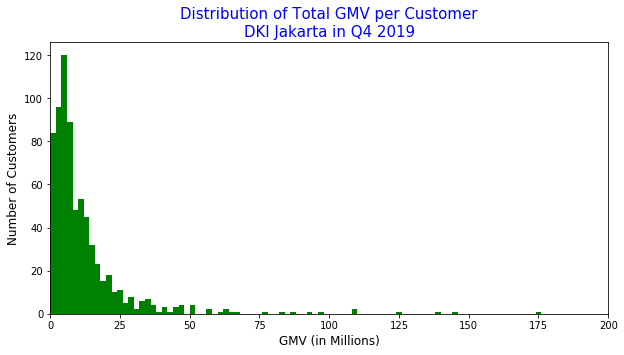

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.hist(data_per_customer['gmv'], bins=100, range=(1,200000000), color='green')
plt.title('Distribution of Total GMV per Customer\nDKI Jakarta in Q4 2019', fontsize=15, color='blue')
plt.xlabel('GMV (in Millions)', fontsize = 12)
plt.ylabel('Number of Customers', fontsize = 12)
plt.xlim(xmin=0, xmax=200000000)
labels, locations = plt.xticks()
plt.xticks(labels, (labels/1000000).astype(int))
plt.show()

From both histogram above, it seems the data distribution has skewness

## Scatterplot
Furthermore, we want to see the relationship between two variabels by scatterplot. In this part, we try to see the correlation between 'quantity' and 'gmv'.

Terlihat bahwa memang semakin besar quantity-nya, GMV cenderung semakin tinggi. Tapi masalahnya datanya banyak terkumpul di nilai-nilai kecil, sehingga tidak begitu terlihat detailnya di area situ.

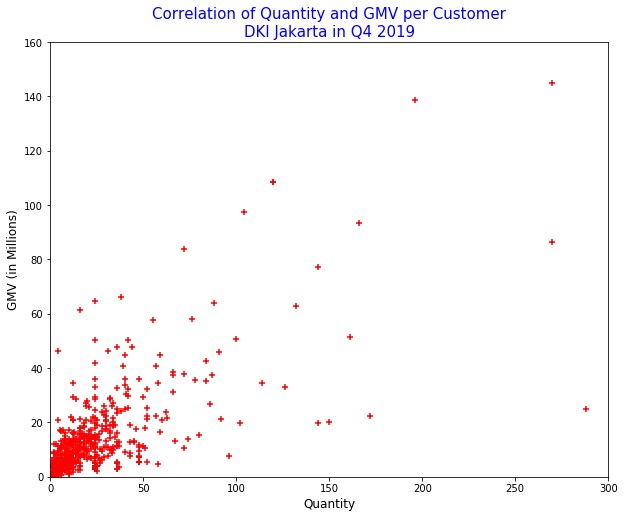

In [14]:
plt.figure(figsize=(10,8))
plt.scatter(data_per_customer['quantity'], data_per_customer['gmv'], marker='+', color='red')
plt.title('Correlation of Quantity and GMV per Customer\nDKI Jakarta in Q4 2019', fontsize=15, color='blue')
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('GMV (in Millions)', fontsize=12)
plt.xlim(xmin=0,xmax=300)
plt.ylim(ymin=0,ymax=150000000)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))
plt.show()

From scatterplot above, the more the 'quantity', the more the value of 'GMV' itself. It means that the both variables have the positive correlation.

# 5. Recap
In this part, we will summarize all the techniques stated above, and applying it again to the data with different purposes.

## 5.1. Finding Top 5 Brand
In this part, we will analyze the top brands in Desember 2019.

In [15]:
top_brands = (dataset[dataset['order_month']=='2019-12'].groupby('brand')['quantity'].sum().reset_index().sort_values(by='quantity',ascending=False).head(5))
dataset_top5brand_dec = dataset[(dataset['order_month']=='2019-12') &(dataset['brand'].isin(top_brands['brand'].to_list()))]
top_brands

,brand,quantity
8,BRAND_S,2197
6,BRAND_P,2194
7,BRAND_R,1508
2,BRAND_C,1365
0,BRAND_A,1315


## 5.2. Multi-line Chart Daily Quantity for Top 5 Brands
After getting the top 5 brands, we will visualize the quantity of top 5 brands by multi-line chart to get the insights.

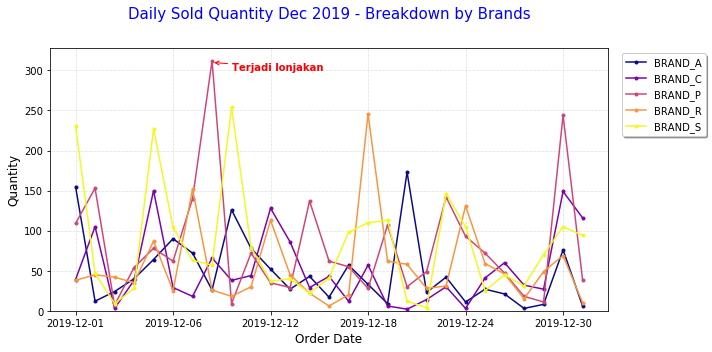

In [16]:
import matplotlib.pyplot as plt
dataset_top5brand_dec.groupby(['order_date','brand'])['quantity'].sum().unstack().plot(marker='.', cmap='plasma')
plt.title('Daily Sold Quantity Dec 2019 - Breakdown by Brands',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Order Date', fontsize = 12)
plt.ylabel('Quantity',fontsize = 12)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
plt.annotate('Terjadi lonjakan', xy=(7, 310), xytext=(8, 300),
weight='bold', color='red',
arrowprops=dict(arrowstyle='->',
connectionstyle="arc3",
color='red'))
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

From chart above, we can see that "Brand P" has the spike during the second week in December.

## 5.3. Number of Orders of Top 5 Brands

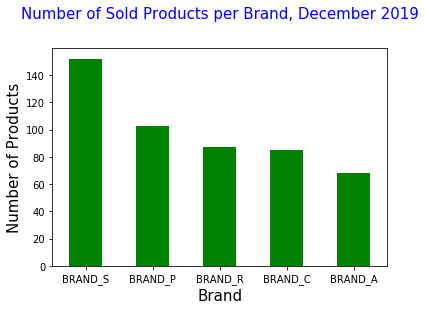

In [17]:
import matplotlib.pyplot as plt
plt.clf()
dataset_top5brand_dec.groupby('brand')['product_id'].nunique().sort_values(ascending=False).plot(kind='bar', color='green')
plt.title('Number of Sold Products per Brand, December 2019',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Brand', fontsize = 15)
plt.ylabel('Number of Products',fontsize = 15)
plt.ylim(ymin=0)
plt.xticks(rotation=0)
plt.show()

Based of number of orders of each brand, "Brand_S" have the most sold products during December 2019.

## 5.4. Number of Products above 100 and below 100 during Desember 2019

In [18]:
import matplotlib.pyplot as plt

dataset_top5brand_dec_per_product = dataset_top5brand_dec.groupby(['brand','product_id'])['quantity'].sum().reset_index()

dataset_top5brand_dec_per_product['quantity_group'] = dataset_top5brand_dec_per_product['quantity'].apply(lambda x: '>= 100' if x>=100 else '< 100')
dataset_top5brand_dec_per_product.sort_values('quantity',ascending=False,inplace=True)

dataset_top5brand_dec_per_product

,brand,product_id,quantity,quantity_group
58,BRAND_A,P0255,258,>= 100
465,BRAND_S,P3534,234,>= 100
238,BRAND_P,P2770,216,>= 100
245,BRAND_P,P2790,185,>= 100
186,BRAND_P,P2489,170,>= 100
...,...,...,...,...
240,BRAND_P,P2774,1,< 100
222,BRAND_P,P2677,1,< 100
221,BRAND_P,P2666,1,< 100
214,BRAND_P,P2587,1,< 100


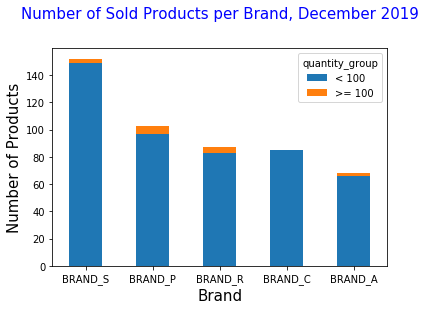

In [19]:
s_sort = dataset_top5brand_dec_per_product.groupby('brand')['product_id'].nunique().sort_values(ascending=False)

dataset_top5brand_dec_per_product.groupby(['brand','quantity_group'])['product_id'].nunique().reindex(index=s_sort.index, level='brand').unstack().plot(kind='bar', stacked=True)
plt.title('Number of Sold Products per Brand, December 2019',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Brand', fontsize = 15)
plt.ylabel('Number of Products',fontsize = 15)
plt.ylim(ymin=0)
plt.xticks(rotation=0)
plt.show()

From all top 5 brands, product in which the number of sold products below 100 more than the other group.

## 5.6. The Correlation

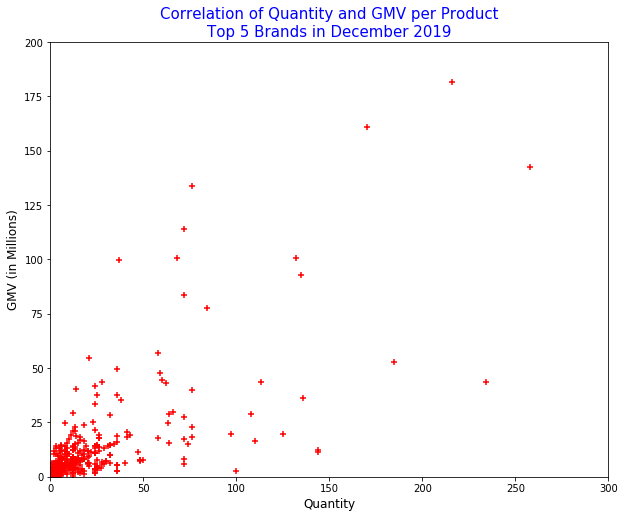

In [20]:
import matplotlib.pyplot as plt
data_per_product_top5brand_dec = dataset_top5brand_dec.groupby('product_id').agg({'quantity': 'sum', 'gmv':'sum', 'item_price':'median'}).reset_index()
plt.figure(figsize=(10,8))
plt.scatter(data_per_product_top5brand_dec['quantity'],data_per_product_top5brand_dec['gmv'], marker='+', color='red')
plt.title('Correlation of Quantity and GMV per Product\nTop 5 Brands in December 2019',fontsize=15, color='blue')
plt.xlabel('Quantity', fontsize = 12)
plt.ylabel('GMV (in Millions)',fontsize = 12)
plt.xlim(xmin=0,xmax=300)
plt.ylim(ymin=0,ymax=200000000)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))
plt.show()

The scatterplot above shows that 'quantity' and GMV have the positive correlation. The more the value of quantity, the more the GMV contribution of corresponding quantity.

<Figure size 432x288 with 0 Axes>

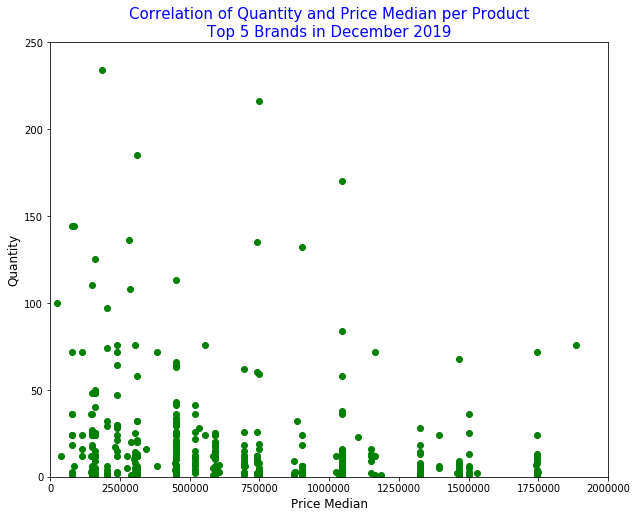

In [21]:
import matplotlib.pyplot as plt
plt.clf()
data_per_product_top5brand_dec = dataset_top5brand_dec.groupby('product_id').agg({'quantity': 'sum', 'gmv':'sum', 'item_price':'median'}).reset_index()
plt.figure(figsize=(10,8))
plt.scatter(data_per_product_top5brand_dec['item_price'],data_per_product_top5brand_dec['quantity'], marker='o', color='green')
plt.title('Correlation of Quantity and Price Median per Product\nTop 5 Brands in December 2019',fontsize=15, color='blue')
plt.xlabel('Price Median', fontsize = 12)
plt.ylabel('Quantity',fontsize = 12)
plt.xlim(xmin=0,xmax=2000000)
plt.ylim(ymin=0,ymax=250)
plt.show()

However, the 'price median' and 'quantity' seems to have no correlation.